In [140]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [141]:
%matplotlib notebook

In [142]:
os.getcwd()

'/Users/cyang/coding/projects/dnpsoup0/py_scripts/case_studies/examples'

In [143]:
data_dir = '../../../results/v2/CW_CrossEffect/'

In [154]:
def get_data(filename):
    df = pd.read_csv(filename, skiprows=2, header=None)
    return df

In [157]:
%matplotlib inline

## SE

#### BuildUp

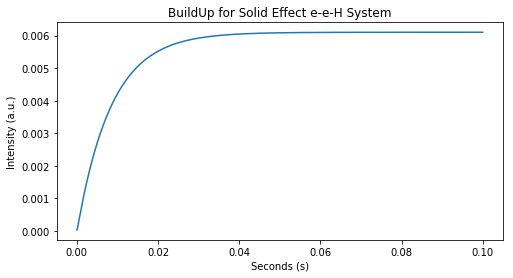

In [186]:
data_dir = '../../../results/v2/CW_CrossEffect/v3/'
filename = 'eeH_1hf_p100ms_1MHz_inc40ns_a0b0g0_static_buildup.result1'
filepath = os.path.join(data_dir, filename)
df = get_data(filepath)
fig = plt.figure(figsize=(8, 4))
plt.plot(df[0], df[1])
plt.title('BuildUp for Solid Effect e-e-H System')
plt.xlabel('Seconds (s)')
plt.ylabel('Intensity (a.u.)')
plt.show()

#### Field Profile

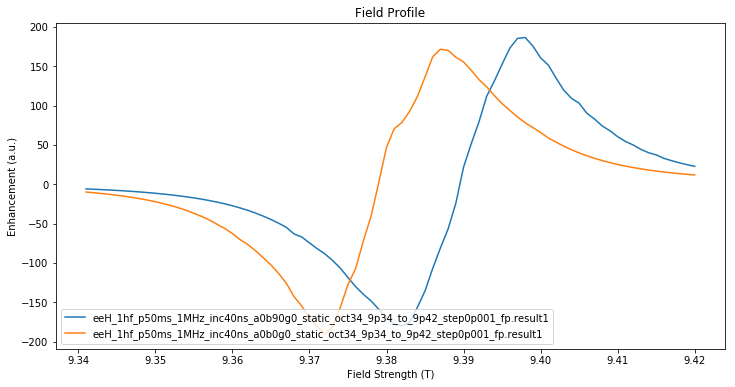

In [184]:
data_dir = '../../../results/v2/CW_CrossEffect/v3/'
filenames = [
    'eeH_1hf_p50ms_1MHz_inc40ns_a0b90g0_static_oct34_9p34_to_9p42_step0p001_fp.result1',
    'eeH_1hf_p50ms_1MHz_inc40ns_a0b0g0_static_oct34_9p34_to_9p42_step0p001_fp.result1'
]
dfs = []
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
for filename in filenames:
    filepath = os.path.join(data_dir, filename)
    df = get_data(filepath)
    dfs.append(df)
    axes.plot(df[0], df[1], label=filename)
    
plt.title('Field Profile')
plt.xlabel('Field Strength (T)')
plt.ylabel('Enhancement (a.u.)')
plt.legend(loc='best')
plt.show()

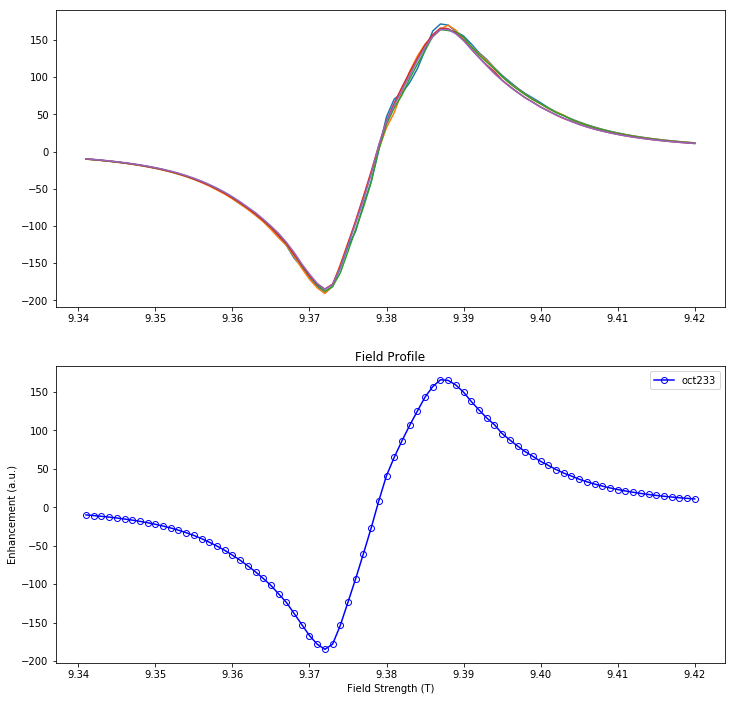

In [177]:
data_dir = '../../../results/v2/CW_CrossEffect/v3/'
powder_options = [
    'oct34', 'oct55', 'oct89', 'oct144', 'oct233'
]
zoom_select = 3
data_se = {}
for powder_option in powder_options:
    filename = f'eeH_1hf_p50ms_1MHz_inc40ns_a0b0g0_static_{powder_option}_9p34_to_9p42_step0p001_fp.result1'
    filepath = os.path.join(data_dir, filename)
    df = get_data(filepath)
    data_se[powder_option] = df
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
for powder_option, df in data_se.items():
    axes[0].plot(df[0], df[1], label=powder_option)
df_chosen = data_se[powder_options[zoom_select]]
axes[1].plot(df_chosen[0], df_chosen[1], 'bo-', markerfacecolor='none', label=powder_option)
# axes[1].set_xlim(9.37, 9.41)
plt.title('Field Profile')
plt.xlabel('Field Strength (T)')
plt.ylabel('Enhancement (a.u.)')
plt.legend(loc='best')
plt.show()

## Eigen Values

In [281]:
datadir = '../../../results/v2/CW_CrossEffect/'

filename = 'eeH_1hf_p150us_1MHz_inc40ns_an80bn141gn320_MAS8kHz_eigenvals.result2'
# filename = 'eeH_1hf_p150us_1MHz_inc40ns_a320b141g80_MAS8kHz_9p394T_eigenvals.result2'
result_path = os.path.join(data_dir, filename)
os.path.exists(result_path)

True

In [284]:
buildup_filename = 'eeH_1hf_p300us_1MHz_inc40ns_an80bn141gn320_MAS8kHz_9p394T_buildup.result2'
buildup_filepath = os.path.join(data_dir, buildup_filename)
os.path.exists(buildup_filepath)

True

In [282]:
df_eigenvals = pd.read_csv(result_path, delimiter=',', skiprows=1, header=None)
df_eigenvals.head()

,0,1,2,3,4,5,6,7,8
0,0.000000e+00,-2.637590e+11,-2.633595e+11,-3.004019e+08,-1.056114e+08,9.908151e+07,2.947671e+08,2.633651e+11,2.637655e+11
1,3.993168e-08,-2.637592e+11,-2.633597e+11,-3.004627e+08,-1.055501e+08,9.901906e+07,2.948300e+08,2.633653e+11,2.637657e+11
2,7.986335e-08,-2.637593e+11,-2.633599e+11,-3.005211e+08,-1.054912e+08,9.895910e+07,2.948905e+08,2.633655e+11,2.637659e+11
3,1.197950e-07,-2.637595e+11,-2.633601e+11,-3.005770e+08,-1.054347e+08,9.890162e+07,2.949485e+08,2.633657e+11,2.637661e+11
4,1.597267e-07,-2.637597e+11,-2.633603e+11,-3.006304e+08,-1.053808e+08,9.884662e+07,2.950041e+08,2.633659e+11,2.637663e+11


In [285]:
df_buildup = pd.read_csv(buildup_filepath, skiprows=2, header=None)
df_buildup.head(3)

,0,1
0,0.000000e+00,0.00003
1,4.000000e-08,0.00003
2,8.000000e-08,0.00003


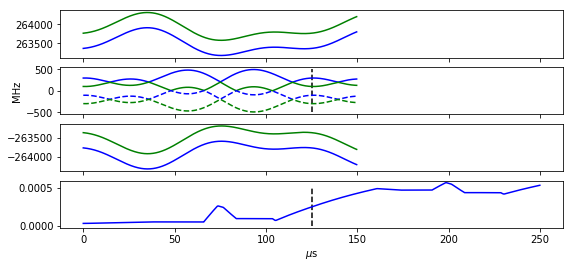

In [291]:
ys = df_eigenvals.loc[:, [1,2,3,4,5,6,7,8]]/1e6
x = df_eigenvals[0] * 1e6
fig, axes = plt.subplots(4, 1, figsize=(9, 4), sharex=True)
axes[0].plot(x, ys.iloc[:, 7], 'g-')
axes[0].plot(x, ys.iloc[:, 6], 'b-')
axes[1].plot(x, ys.iloc[:, 5], 'b-')
axes[1].plot(x, ys.iloc[:, 4], 'g-')
axes[1].plot(x, ys.iloc[:, 3], 'b--')
axes[1].plot(x, ys.iloc[:, 2], 'g--')
axes[1].vlines(125, -500, 500, linestyle='dashed')
axes[2].plot(x, ys.iloc[:, 1], 'g-')
axes[2].plot(x, ys.iloc[:, 0], 'b-')
axes[3].plot(df_buildup[0]*1e6, df_buildup[1], 'b-')
axes[3].vlines(125, 0, 5e-4, linestyle='dashed')
axes[1].set_ylabel('MHz')
plt.xlabel('$\mu$s')
plt.show()

## BuildUps

### BuildUp for ~ ms

#### Euler Angle Dependence

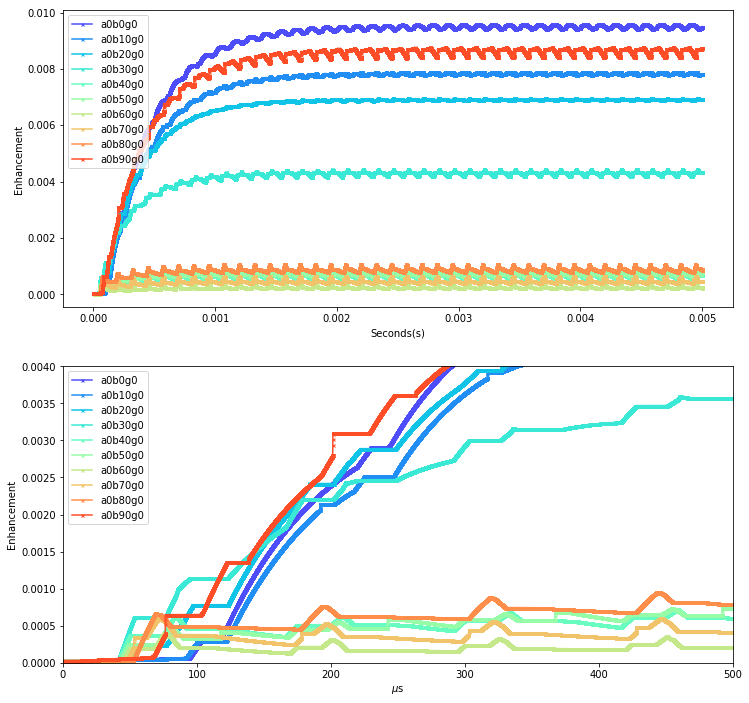

In [268]:
data_dir = '../../../results/v2/CW_CrossEffect/v3'
angles = [f'a0b{val}g0' for val in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]]
filenames = [
    f'eeH_1hf_p5ms_1MHz_inc40ns_{angle}_MAS8kHz_buildup.result2' for angle in angles
]
n = len(filenames)
colors = plt.cm.rainbow(np.linspace(0.1,0.9,n))
# filename = 'eHH_p150us_1MHz_mas8kHz_inc40ns_a0b0g0_oct144_buildup.result11'
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
for filename, angle, color in zip(filenames, angles, colors):  
    filepath = os.path.join(data_dir, filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, skiprows=2, header=None)
        axes[0].plot(df[0], df[1], label=angle, color=color, marker='x', markersize=3, markerfacecolor='none')
        axes[1].plot(df[0]*1e6, df[1], label=angle, color=color, marker='x', markersize=3, markerfacecolor='none')
        
axes[0].set_ylabel('Enhancement')
axes[0].set_xlabel('Seconds(s)')
axes[1].set_ylabel('Enhancement')
axes[1].set_xlabel('$\mu$s')
axes[1].set_xlim(0, 500)
axes[1].set_ylim(0, 4e-3)
axes[0].legend()
axes[1].legend()
plt.show()

#### Increment

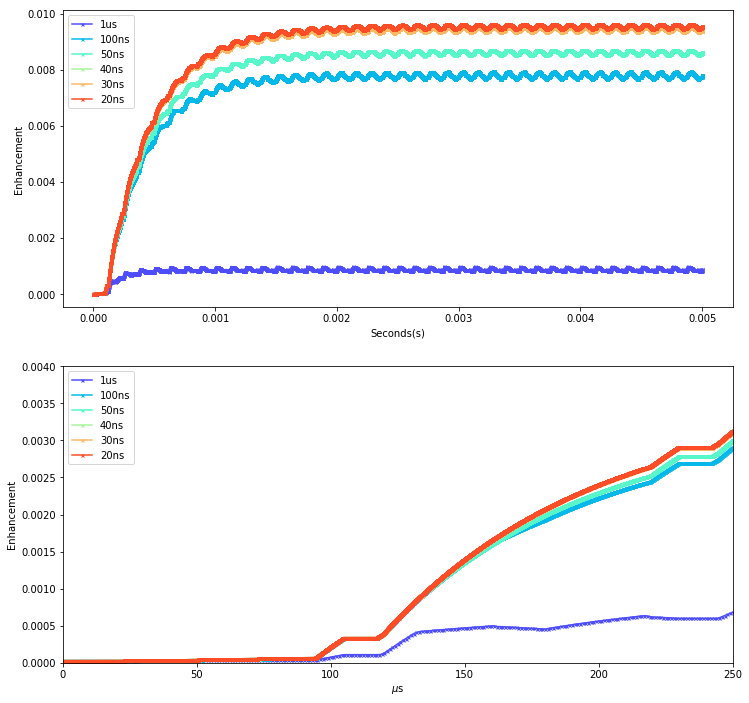

In [280]:
data_dir = '../../../results/v2/CW_CrossEffect/v3'
incs = ['1us', '100ns', '50ns', '40ns', '30ns', '20ns']
filenames = [
    f'eeH_1hf_p5ms_1MHz_inc{inc}_a0b0g0_MAS8kHz_buildup.result2' for inc in incs
]
n = len(filenames)
colors = plt.cm.rainbow(np.linspace(0.1,0.9,n))
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
for filename, inc, color in zip(filenames, incs, colors):  
    filepath = os.path.join(data_dir, filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, skiprows=2, header=None)
        axes[0].plot(df[0], df[1], label=inc, color=color, marker='x', markersize=3, markerfacecolor='none')
        axes[1].plot(df[0]*1e6, df[1], label=inc, color=color, marker='x', markersize=3, markerfacecolor='none')
        
axes[0].set_ylabel('Enhancement')
axes[0].set_xlabel('Seconds(s)')
axes[1].set_ylabel('Enhancement')
axes[1].set_xlabel('$\mu$s')
axes[1].set_xlim(0, 250)
axes[1].set_ylim(0, 4e-3)
axes[0].legend()
axes[1].legend()
plt.show()

#### Build Up with direct piecewise evolution vs with MasterEqTerms

In [7]:
data_dir = '../../../results/v2/CW_CrossEffect/'

<IPython.core.display.Javascript object>


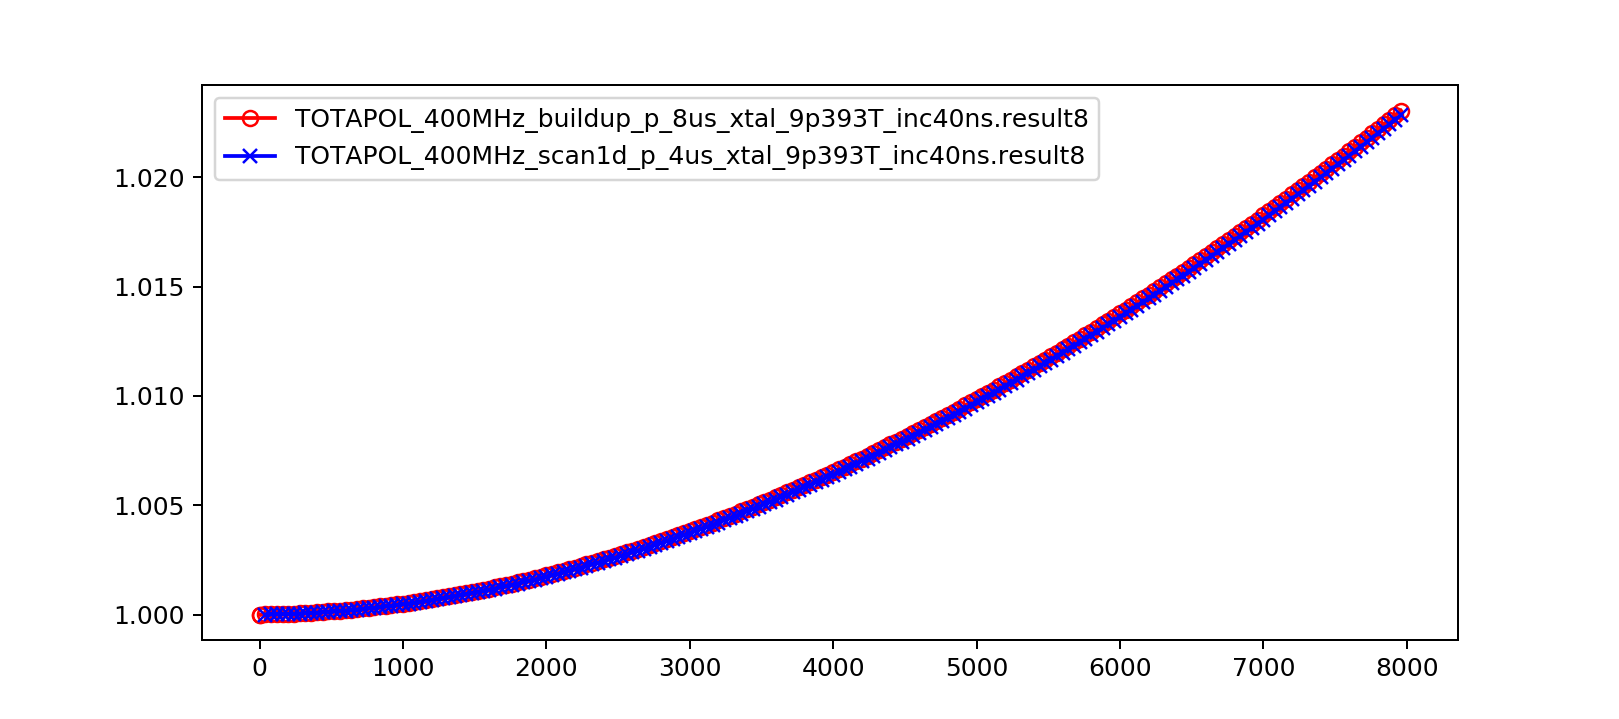

In [16]:
# 400 MHz
filename1 = 'TOTAPOL_400MHz_buildup_p_8us_xtal_9p393T_inc40ns.result8'
filename2 = 'TOTAPOL_400MHz_scan1d_p_4us_xtal_9p393T_inc40ns.result8'
# filename2 = 'TOTAPOL_400MHz_fp_xtal_a0b0g0_9p393T_inc10ns.result7' # 1/20th rotor period calculate gamma
path1, path2 = os.path.join(data_dir, filename1), os.path.join(data_dir, filename2)
df1, df2 = pd.read_csv(path1, skiprows=2, header=None), pd.read_csv(path2, skiprows=2, header=None)
fig = plt.figure(figsize=(9, 4))
plt.plot(df1[0]/1e-9, df1[1], 'ro-', markerfacecolor='none', label=filename1)
plt.plot(df2[0], df2[1], 'bx-', markerfacecolor='none', label=filename2)

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


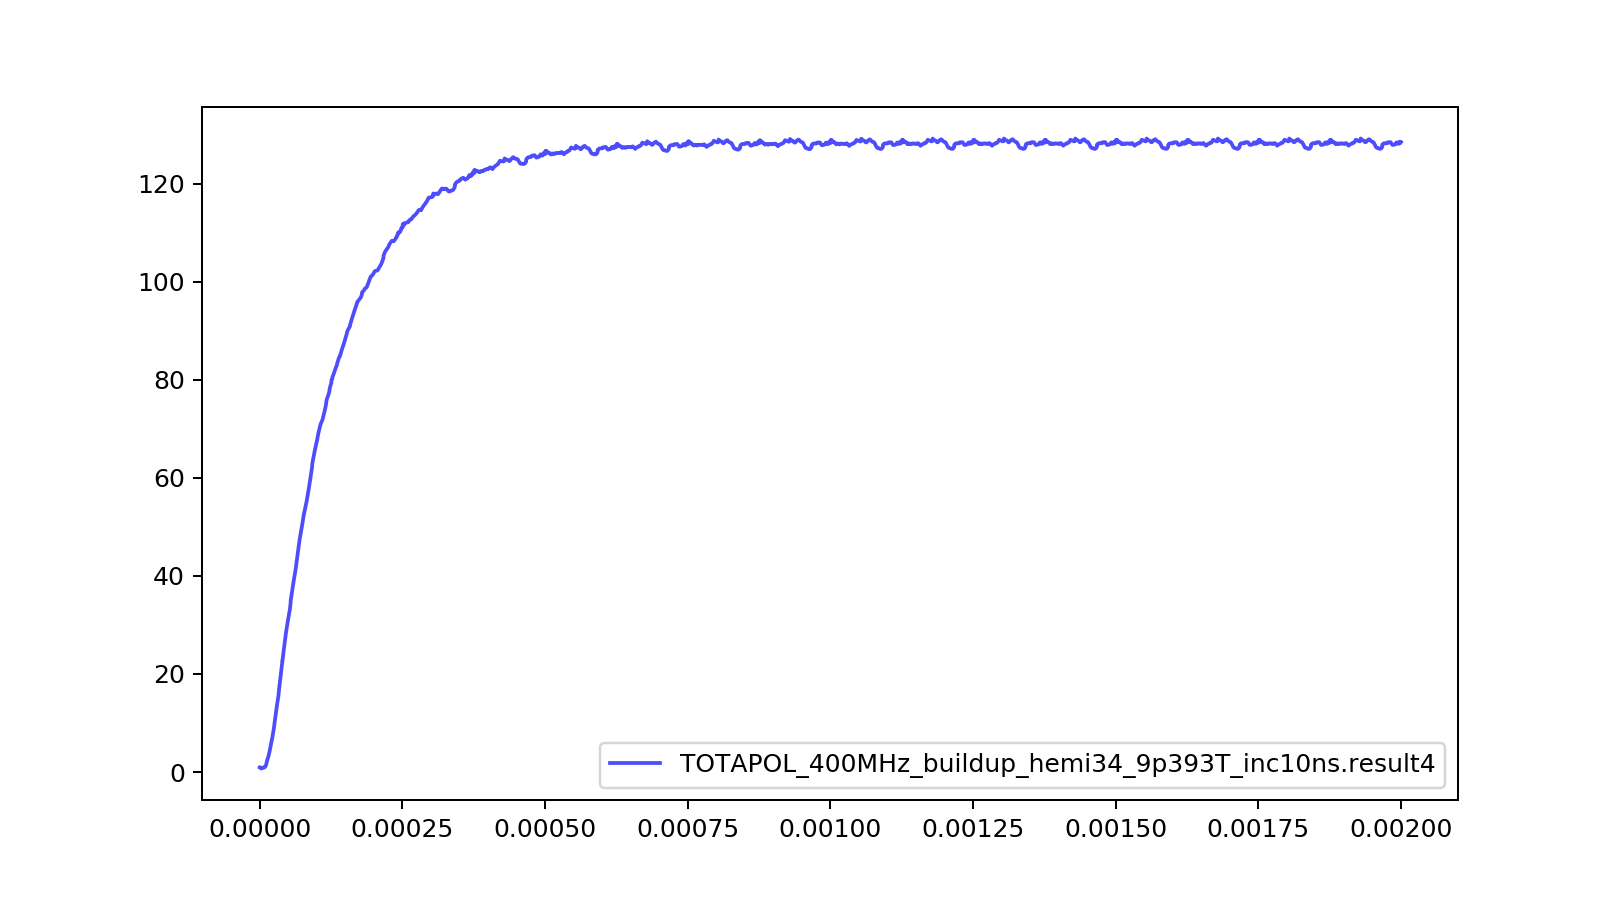

In [11]:
# powder
data_dir = '../../../results/v2/CW_CrossEffect/'
# filename = 'TOTAPOL_400MHz_buildup_xtal_9p393T_inc1us.result4'
filenames = [
    'TOTAPOL_400MHz_buildup_hemi34_9p393T_inc10ns.result4'
]
markers = [
    's', '^', 'o', 'd', 'x', '+'
]
n = len(filenames)
colors = plt.cm.rainbow(np.linspace(0.1,0.9,n))
fig, axes = plt.subplots(1, 1, figsize=(9, 5))
for filename, c, m in zip(filenames, colors, markers):
    filepath = os.path.join(data_dir, filename)
    df = pd.read_csv(filepath, skiprows=2, header=None)
    axes.plot(df[0], df[1], color=c, label=filename)
plt.legend()
plt.show()

### Field Profile

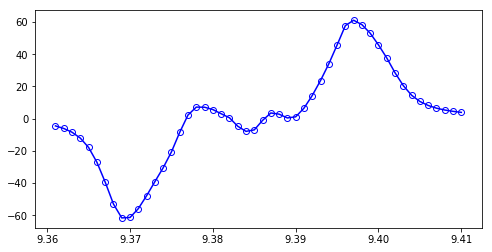

In [271]:
data_dir = '../../../results/v2/CW_CrossEffect/v3'
filename = 'eeH_1hf_p2ms_1MHz_inc40ns_a0b0g0_static_hemi144_9p36_to_9p41_step0p001_fp.result2'
filepath = os.path.join(data_dir, filename)
df = pd.read_csv(filepath, skiprows=2, header=None)
fig = plt.figure(figsize=(8, 4))
plt.plot(df[0], df[1], 'bo-', markerfacecolor='none')
plt.show()

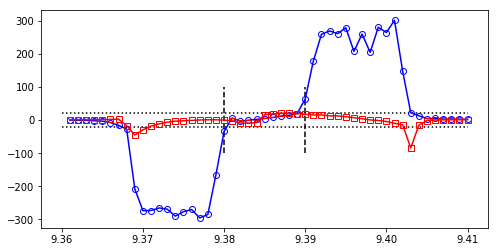

In [341]:
data_dir = '../../../results/v2/CW_CrossEffect/v3'
# filename = 'eeH_1hf_p2ms_1MHz_inc40ns_a0b0g0_hemi21_9p36_to_9p41_step0p001_fp.result2'
filename = 'eeH_1hf_p2ms_1MHz_inc100ns_a0b0g0_mas8kHz_a0b0g0_9p36_to_9p41_step0p001_fp.result2'
filename2 = 'eeH_1hf_p2ms_1MHz_inc100ns_a0b45g0_mas8kHz_a0b0g0_9p36_to_9p41_step0p001_fp.result2'
filepath = os.path.join(data_dir, filename)
filepath2 = os.path.join(data_dir, filename2)
df = pd.read_csv(filepath, skiprows=2, header=None)
df2 = pd.read_csv(filepath2, skiprows=2, header=None)
fig = plt.figure(figsize=(8, 4))
plt.plot(df[0], df[1], 'bo-', markerfacecolor='none')
plt.plot(df2[0], df2[1], 'rs-', markerfacecolor='none')
plt.vlines(9.38, -100, 100, linestyle='dashed')
plt.vlines(9.39, -100, 100, linestyle='dashed')
plt.hlines(-20, 9.36, 9.41, linestyle='dotted')
plt.hlines(20, 9.36, 9.41, linestyle='dotted')
# plt.ylim(-100, 100)
plt.show()

## Trouble shooting 9.38 ~ 9.39 reasons for no enhancement

              0             1             2             3             4  \
0  0.000000e+00 -2.637147e+11 -2.633151e+11 -2.922437e+08 -9.491823e+07   
1  3.993168e-08 -2.637153e+11 -2.633157e+11 -2.916199e+08 -9.554211e+07   
2  7.986335e-08 -2.637159e+11 -2.633163e+11 -2.909957e+08 -9.616646e+07   

              5             6             7             8  
0  1.073472e+08  3.046727e+08  2.633026e+11  2.637022e+11  
1  1.079711e+08  3.040489e+08  2.633033e+11  2.637028e+11  
2  1.085953e+08  3.034245e+08  2.633039e+11  2.637035e+11  
          0        1
0  0.000000  0.00003
1  0.000001  0.00003
2  0.000002  0.00004


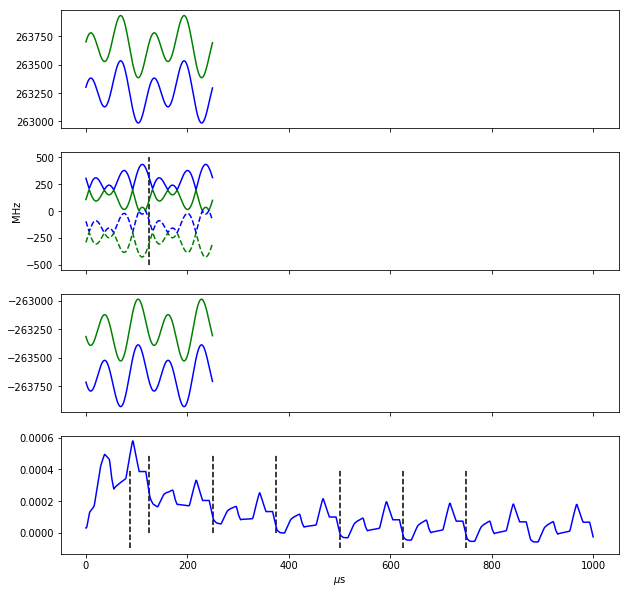

In [321]:
data_dir = '../../../results/v2/CW_CrossEffect/v3'
filename = 'eeH_1hf_p250us_1MHz_inc40ns_a0b0g0_9p385T_eigval.result2'
filepath = os.path.join(data_dir, filename)
df_eigenvals = pd.read_csv(filepath, delimiter=',', skiprows=1, header=None)
print(df_eigenvals.head(3))

filename = 'eeH_1hf_p1ms_1MHz_inc40ns_a0b0g0_9p385T_buildup.result2'
filepath = os.path.join(data_dir, filename)
df_buildup = pd.read_csv(filepath, skiprows=2, header=None)
print(df_buildup.head(3))

ys = df_eigenvals.loc[:, [1,2,3,4,5,6,7,8]]/1e6
x = df_eigenvals[0] * 1e6
fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
axes[0].plot(x, ys.iloc[:, 7], 'g-')
axes[0].plot(x, ys.iloc[:, 6], 'b-')
axes[1].plot(x, ys.iloc[:, 5], 'b-')
axes[1].plot(x, ys.iloc[:, 4], 'g-')
axes[1].plot(x, ys.iloc[:, 3], 'b--')
axes[1].plot(x, ys.iloc[:, 2], 'g--')
axes[1].vlines(125, -500, 500, linestyle='dashed')
axes[2].plot(x, ys.iloc[:, 1], 'g-')
axes[2].plot(x, ys.iloc[:, 0], 'b-')
axes[3].plot(df_buildup[0]*1e6, df_buildup[1], 'b-')
axes[3].vlines(125, 0, 5e-4, linestyle='dashed')
axes[3].vlines(250, 0, 5e-4, linestyle='dashed')
axes[3].vlines(375, 0, 5e-4, linestyle='dashed')
axes[3].vlines(500, -1e-4, 4e-4, linestyle='dashed')
axes[3].vlines(625, -1e-4, 4e-4, linestyle='dashed')
axes[3].vlines(750, -1e-4, 4e-4, linestyle='dashed')
axes[3].vlines(87, -1e-4, 4e-4, linestyle='dashed')
axes[1].set_ylabel('MHz')
plt.xlabel('$\mu$s')
plt.show()

In [327]:
def get_buildup_data(filepath):
    df_buildup = pd.read_csv(filepath, skiprows=2, header=None)
    return df_buildup

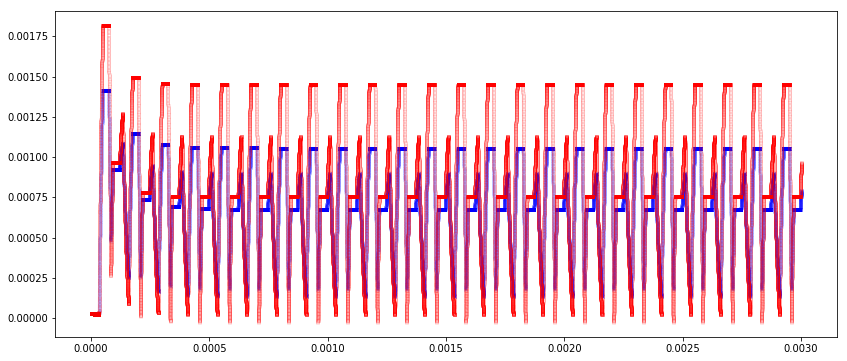

In [332]:
data_dir = '../../../results/v2/CW_CrossEffect/v3'
filename = 'eeH_e_T1_300us_T2_1us_H_T1_4s_T2_200us_1hf_p3ms_1MHz_inc40ns_a0b45g0_9p385T_buildup.result2'
filepath = os.path.join(data_dir, filename)
filename2 = 'eeH_e_T1_200us_T2_1us_H_T1_4s_T2_200us_1hf_p3ms_1MHz_inc40ns_a0b45g0_9p385T_buildup.result2'
filepath2 = os.path.join(data_dir, filename2)
df_buildup = pd.read_csv(filepath, skiprows=2, header=None)
df_buildup2 = pd.read_csv(filepath2, skiprows=2, header=None)
fig = plt.figure(figsize=(14, 6))
plt.plot(df_buildup[0], df_buildup[1], 'bx-', markerfacecolor='none', markersize=3, alpha=0.1)
plt.plot(df_buildup2[0], df_buildup2[1], 'rs-', markerfacecolor='none', markersize=3, alpha=0.1)
# plt.xlim(0.0025, 0.003)
plt.show()